# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [자전거 수요 Data](https://www.kaggle.com/bike-sharing-demand/data
)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 0. 라이브러리 준비

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. 분석의 목적과 변수 확인 : 뉴욕 자전거 수요 예측

In [34]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bike_Sharing_Demand_Full.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      17379 non-null  int64  
 10  registered  17379 non-null  int64  
 11  count       17379 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.6+ MB


## 2. 데이터 전체적으로 살펴보기

In [35]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [36]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
std,1.106918,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


## 3. 데이터의 개별 속성 파악하기

### 가설 1 : 영업일에 평균 이용량이 더 많다


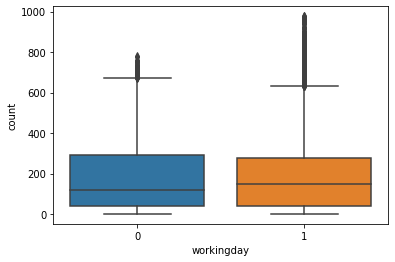

In [37]:
sns.boxplot(x=df['workingday'],y=df['count'] )
plt.show()

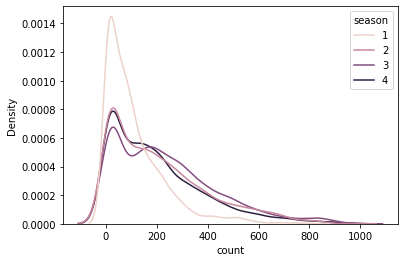

In [38]:
#@title 가설 2: 계절별 자전거 이용 행동은 다르다
#- season1에는 덜 이용. season3 에는 이용빈도가 높았다(=fat-tail)
sns.kdeplot(hue=df['season'], x=df['count'])
plt.show()

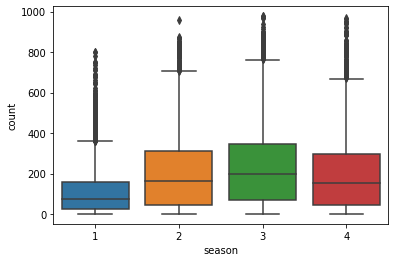

In [39]:
sns.boxplot(x=df['season'], y=df['count'])
plt.show()

[]

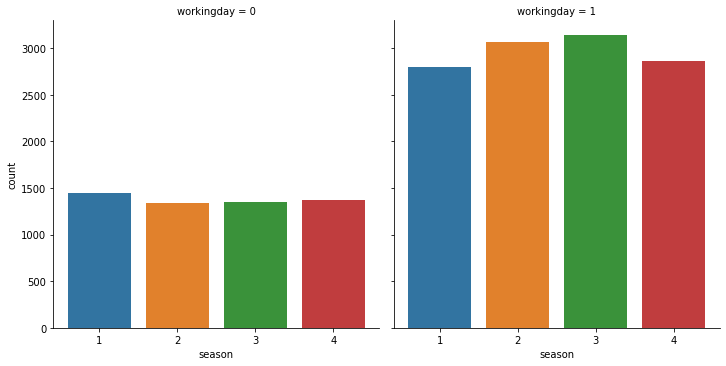

In [59]:
# 같은 계절이여도 영업일인지 아닌지에 따라 다르게 나타나므로 더미변수 생성시 'workinday + season'묶어서 만드는 게 좋겠다
sns.catplot(data=df, x='season', col='workingday', kind='count')
plt.plot()

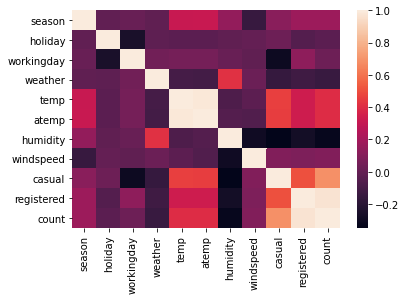

In [43]:
sns.heatmap(df.corr())


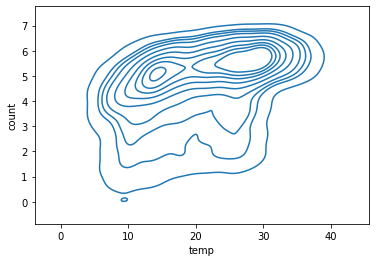

In [50]:
#@title 가설3 : 온도는 자전거 이용과 관련이 있다
# sns.kdeplot(x=df['temp'], y=np.log(df['count']), hue=df['season'])
sns.kdeplot(x=df['temp'], y=np.log(df['count']))
plt.show()

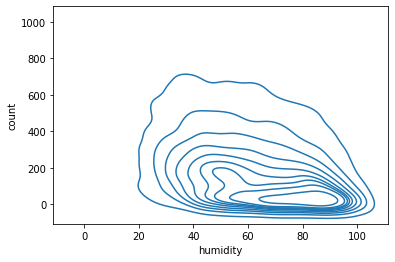

In [53]:
#@title 가설4: 습도는 자전거 이용에 영향을 준다
# 습도가 높아지면, 자전거 이용이 감소한다

# sns.kdeplot(x=df['humidity'], y=df['count'], hue=df['season'])
sns.kdeplot(x=df['humidity'], y=df['count'])
plt.show()